In [ ]:
import pickle
import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from ipywidgets import interact, widgets

# Load the dataset
dataset_path = 'dataset_carla.csv'
df = pd.read_csv(dataset_path)

# Preprocess the data
df.dropna(inplace=True)  # Drop rows with missing values
X = df.drop('Theta', axis=1)  # Features
y = df['Theta']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Save the trained model to a file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from the file
with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Function to predict theta based on input parameters
def predict_theta(mass, radius_of_curvature, cof, speed):
    f_seat = mass * 9.8
    f_friction = f_seat * cof
    formula_theta = np.arctan(f_seat * (speed ** 2) - f_friction * 9.8 * radius_of_curvature / (f_seat + f_friction * speed ** 2))
    dummy_data = {
        'Speed_car': [speed],
        'cof_Range': [cof],
        'Radius_curvature': [radius_of_curvature],
        'Mass_person': [mass]
    }
    dummy_df = pd.DataFrame(dummy_data)
    prediction = np.abs(loaded_model.predict(dummy_df))
    return prediction[0]

# Interactive function to predict theta and calculate error
def predict_and_calculate_error(mass_value, radius_value, cof_value, speed_value):
    theta_predicted = predict_theta(mass_value, radius_value, cof_value, speed_value)
    return theta_predicted

# Define sliders for input parameters
mass_slider = widgets.FloatSlider(value=70, min=50, max=120, step=0.01, description='Mass (kg)')
radius_slider = widgets.FloatSlider(value=2, min=1, max=10, step=0.01, description='Radius (m)')
cof_slider = widgets.FloatSlider(value=0.8, min=0.1, max=1, step=0.01, description='Friction Coefficient')
speed_slider = widgets.FloatSlider(value=0.348, min=0, max=1, step=0.01, description='Speed (m/s)')

# Create an interactive widget
interactive_plot = interact(predict_and_calculate_error, mass_value=mass_slider, radius_value=radius_slider,
                             cof_value=cof_slider, speed_value=speed_slider)

# Display the interactive widget
interactive_plot


interactive(children=(FloatSlider(value=70.0, description='Mass (kg)', max=120.0, min=50.0, step=0.01), FloatS…

<function __main__.predict_and_calculate_error(mass_value, radius_value, cof_value, speed_value)>

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R^2) Score
r2 = r2_score(y_test, predictions)
print("R-squared (R^2) Score:", r2)


Mean Squared Error: 0.006415641305814872
Mean Absolute Error: 0.02789441568004729
R-squared (R^2) Score: 0.9850358607095161


In [ ]:
# Generate random inputs
np.random.seed(42)  # For reproducibility
num_samples = 50
speed_values = np.random.uniform(0.1, 2.0, num_samples)
f_seat_values = np.random.uniform(0.5, 2.0, num_samples)
f_friction_values = np.random.uniform(0.1, 1.0, num_samples)
radius_of_curvature_values = np.random.uniform(1, 10, num_samples)
mass_values = np.random.uniform(50, 100, num_samples)

# Store predictions using the decision tree model
tree_values = []
for speed, f_seat, f_friction, radius_of_curvature, mass in zip(speed_values, f_seat_values, f_friction_values, radius_of_curvature_values, mass_values):
    theta_predicted = predict_theta(mass, radius_of_curvature, f_friction, speed)
    tree_values.append(theta_predicted)


In [ ]:
tree_values


In [ ]:
#NN Predicted Values
NN_values=[1.0573819 , 0.8320406 , 0.8571352 , 0.95233345, 1.0693259 ,
       0.9438918 , 0.9457692 , 0.80241746, 0.7485354 , 0.85574996,
       0.9107557 , 0.7601535 , 0.9472592 , 0.9382369 , 0.8334673 ,
       1.033152  , 0.8544393 , 0.8745722 , 0.765911  , 1.0118729 ,
       0.98025596, 0.8163159 , 0.86477554, 0.9014265 , 0.9728697 ,
       0.8323456 , 1.0229219 , 0.8178859 , 0.91973597, 0.83531904,
       0.91398346, 0.87231016, 1.0149966 , 0.7560804 , 0.7389622 ,
       0.82797515, 1.0309299 , 0.98306125, 0.94714767, 0.8668538 ,
       0.82823676, 1.0110322 , 1.0726422 , 0.8488252 , 0.93387026,
       0.83847564, 0.9881454 , 0.9647948 , 0.8356291 , 0.9494045 ]

#Calculated Formula Values
formula=[1.34581889, 0.7736936 , 0.83785146, 1.44849386, 1.55335657,
       1.37063232, 1.55063227, 1.5103152 , 1.44905327, 1.43422816,
       1.49928256, 1.38594265, 1.46108261, 1.54424691, 1.48099776,
       1.55047978, 1.53565854, 0.95787775, 1.45040193, 1.50598267,
       1.5109135 , 1.48017673, 1.53883513, 1.12873994, 1.46670741,
       0.27834928, 1.53917191, 1.52718577, 1.42138948, 1.51426398,
       1.35835592, 1.3089922 , 1.51769559, 1.50402895, 1.26950838,
       1.47518224, 1.52963446, 1.53545505, 1.38968403, 1.49766689,
       1.52552037, 1.49629969, 1.53685391, 1.37141328, 1.43581074,
       0.93218119, 1.5368061 , 1.53236786, 1.51204606, 1.54410711]

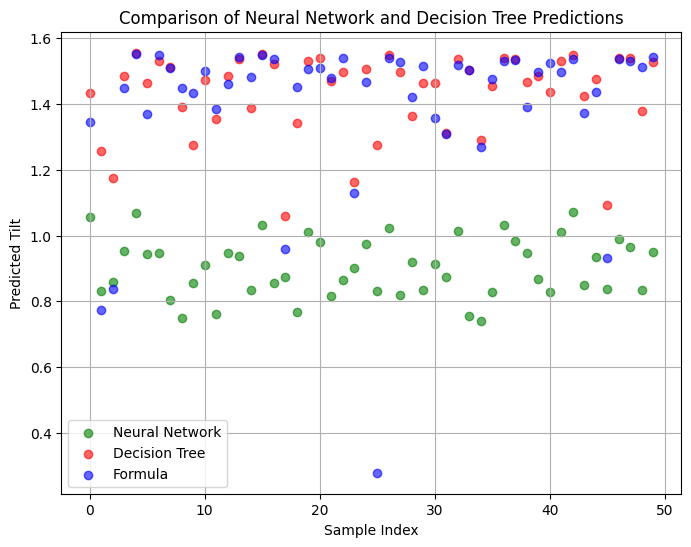

In [ ]:
import matplotlib.pyplot as plt

# Plot the values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(NN_values)), NN_values, color='green', label='Neural Network', alpha=0.6)
plt.scatter(range(len(tree_values)), tree_values, color='red', label='Decision Tree', alpha=0.6)
plt.scatter(range(len(formula)), formula, color='blue', label='Formula', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Tilt')
plt.title('Comparison of Neural Network and Decision Tree Predictions')
plt.legend()
plt.grid(True)

plt.show()


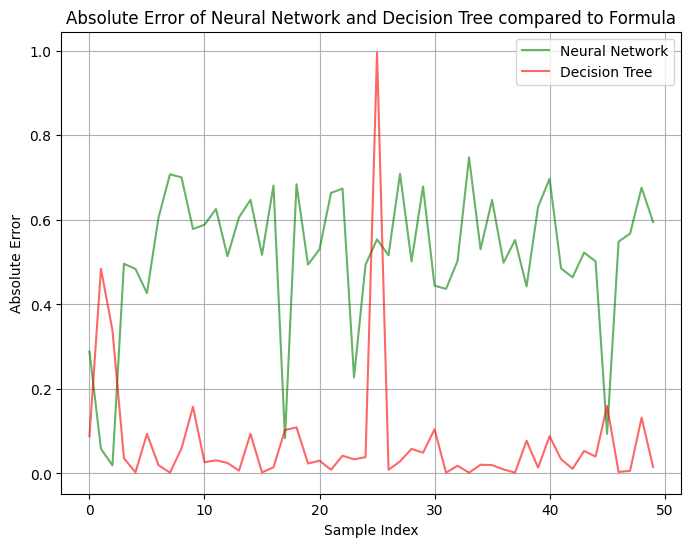

In [ ]:
# Convert lists to NumPy arrays
NN_values = np.array(NN_values)
tree_values = np.array(tree_values)
formula = np.array(formula)

# Calculate absolute errors
nn_abs_error = np.abs(NN_values - formula)
tree_abs_error = np.abs(tree_values - formula)

# Plot the absolute errors
plt.figure(figsize=(8, 6))
plt.plot(range(len(nn_abs_error)), nn_abs_error, color='green', label='Neural Network', alpha=0.6)
plt.plot(range(len(tree_abs_error)), tree_abs_error, color='red', label='Decision Tree', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Absolute Error')
plt.title('Absolute Error of Neural Network and Decision Tree compared to Formula')
plt.legend()
plt.grid(True)

plt.show()


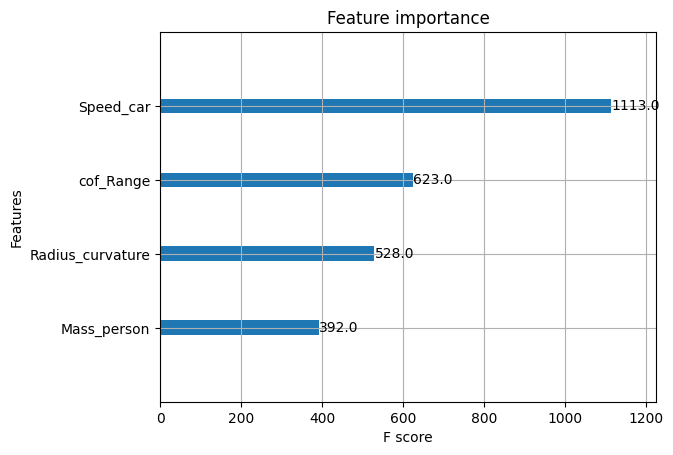

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance for XGBoost model
xgb.plot_importance(loaded_model)
plt.show()


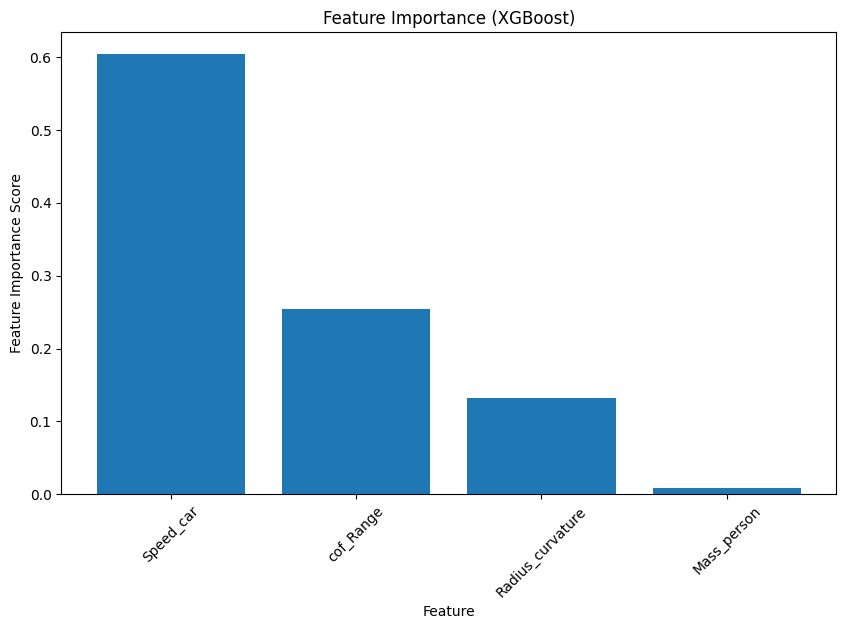

In [ ]:
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the trained XGBoost model
with open('xgboost_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Get feature importance
feature_importance = model.feature_importances_

# Get feature names
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance (XGBoost)')
plt.xticks(rotation=45)
plt.show()


            Feature  Importance
0         Speed_car    0.603958
1         cof_Range    0.254764
2  Radius_curvature    0.132630
3       Mass_person    0.008648


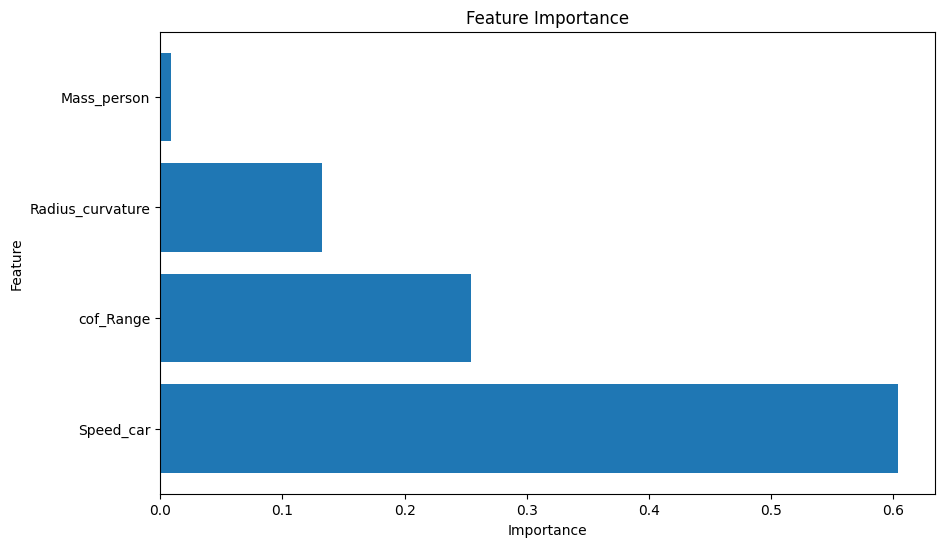

In [ ]:
# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


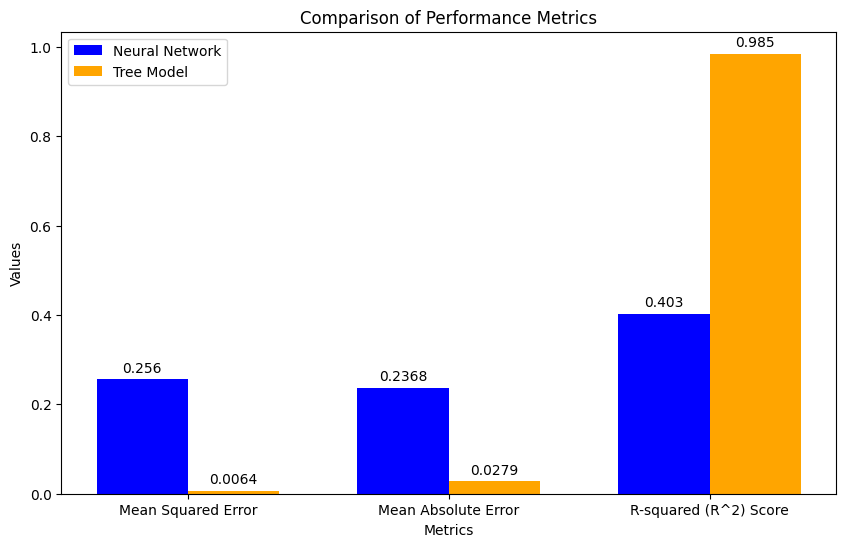

In [ ]:
import matplotlib.pyplot as plt

# Metrics for the neural network model
mse_nn = 0.2559658896285485
mae_nn = 0.2367509986328215
r2_nn = 0.4029732892731094

# Metrics for the tree-based model
mse_tree = 0.006415641305814872
mae_tree = 0.02789441568004729
r2_tree = 0.9850358607095161

# Metric names
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared (R^2) Score']

# Metric values for both models
nn_values = [mse_nn, mae_nn, r2_nn]
tree_values = [mse_tree, mae_tree, r2_tree]

# Plotting
x = range(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, nn_values, width, label='Neural Network', color='blue')
bars2 = plt.bar([i + width for i in x], tree_values, width, label='Tree Model', color='orange')

# Add text annotations
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 4)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Performance Metrics')
plt.xticks([i + width/2 for i in x], metrics)
plt.legend()
plt.show()
